In [1]:
import sympy, math
from sympy.interactive import printing
printing.init_printing(use_latex=True)

a, b, h, x, p, s = sympy.symbols("a b h x p s")
# h + s*cos(a) = p*sin(b)
# x = s*sin(a) + p*cos(b)

ss = {"h":37, "s":73, "p":150, "x":106}

eqs = [h+s*sympy.cos(a) - p*sympy.sin(b), 
       x-s*sympy.sin(a) - p*sympy.cos(b)]
# minx = math.sqrt(p**2 - (h+s)**2) when a=0

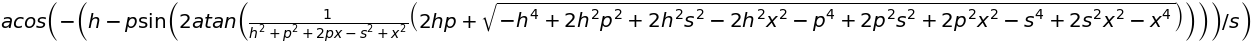

In [3]:
solns = sympy.solve(eqs, (a,b))
sa, sb = solns[3]
sa

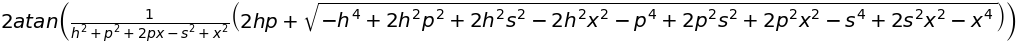

In [4]:
sb

In [5]:
va, vb = sa.subs(ss).evalf(), sb.subs(ss).evalf()
va, vb

In [6]:
eqs[0].subs(ss).subs({"a":va, "b":vb}).evalf(), eqs[1].subs(ss).subs({"a":va, "b":vb}).evalf()

In [7]:
eqs[0].subs({"a":sa, "b":sb})

In [8]:
# does not properly cancel
eqs[1].subs({"a":sa, "b":sb}).subs(ss).evalf()

In [9]:
# now add a number, square it, and subtract the square, and it should be zero
# to successfully cancel out the b values
eqs1= [((eqs[0] + p*sympy.sin(b))**2 - (p*sympy.sin(b))**2), 
     ((eqs[1] + p*sympy.cos(b))**2 - (p*sympy.cos(b))**2) ]
eqs2 = (eqs1[0]+eqs1[1]).simplify()
eqs2


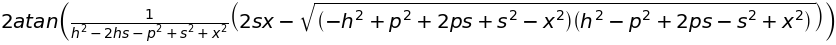

In [10]:
sa = sympy.solve(eqs2, a)[0]
sa

In [38]:
sa.subs(ss).evalf()

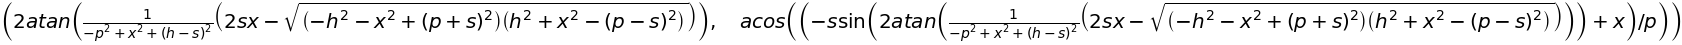

In [49]:
# leads to the shortest solution
hps1 = -h**2 + (p+s)**2
hps2 = h**2 - (p-s)**2
hps3 = (h-s)**2 - p**2

x2 = x**2
sa = 2*sympy.atan((2*s*x - sympy.sqrt((hps1 - x2)*(hps2 + x2)))/(hps3 + x2))
sb = sympy.acos((-s*sympy.sin(a) + x)/p)

sa, sb

In [50]:
sa.subs(ss).evalf()

In [51]:
eqs[1].subs({"a":sa, "b":sb})

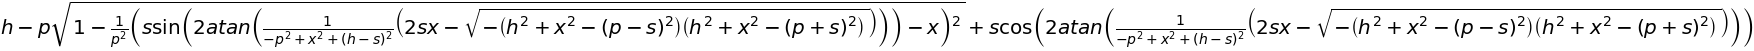

In [57]:
eqs[0].subs({"a":sa, "b":sb}).simplify()

In [54]:
eqs[0].subs({"a":sa, "b":sb}).subs(ss).evalf()

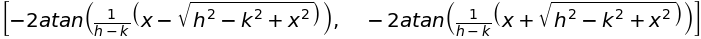

In [73]:
# the by hand solution of eqs2
k = sympy.symbols("k")
eqs3 = (eqs2 - (x**2 + h**2 + s**2 - p**2))/(2*s) + k
sympy.solve(eqs3, a)

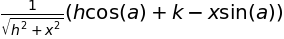

In [77]:
l = sympy.sqrt(x**2 + h**2)
eqs4 = eqs3.simplify()/l
eqs4

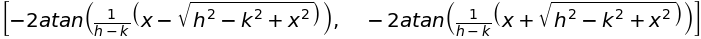

In [78]:
sympy.solve(eqs4, a)

In [ ]:
# Use the law of cosines on the triangle between hypot hx and other sides